<a href="https://colab.research.google.com/github/Likhi2001/Likhitha_Jarugula_INFO5731_SPRING2024/blob/main/Jarugula__Likhitha_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
import pandas as pd
from collections import Counter
from nltk.util import ngrams
from nltk import word_tokenize
import nltk
from nltk.corpus import stopwords
from nltk import pos_tag, word_tokenize

nltk.download('averaged_perceptron_tagger')

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset
data = pd.read_csv('clean_movie_reviews.csv')

# Function to preprocess text: tokenize and remove stopwords
def preprocess(text):
    # Define English stopwords
    stop_words = set(stopwords.words('english'))
    # Tokenize and remove stopwords
    tokens = [word for word in word_tokenize(text.lower()) if word.isalpha() and word not in stop_words]
    return tokens

# Function to count N-grams
def count_ngrams(data, n):
    ngram_counts = Counter()
    for review in data:
        tokens = preprocess(review)
        ngrams_in_review = ngrams(tokens, n)
        ngram_counts.update(ngrams_in_review)
    return ngram_counts

# Function to calculate bigram probabilities
def calculate_bigram_probabilities(data):
    bigram_counts = count_ngrams(data, 2)
    first_word_counts = Counter([bigram[0] for bigram in bigram_counts])

    bigram_probabilities = {bigram: count / first_word_counts[bigram[0]] for bigram, count in bigram_counts.items()}
    return bigram_probabilities

# Count the frequency of all the 3-grams
three_grams_counts = count_ngrams(data['Clean_Body'], 3)

# Calculate the probabilities for all bigrams
bigram_probabilities = calculate_bigram_probabilities(data['Clean_Body'])

# Display the results
print("Top 10 most common 3-grams:")
for three_gram, count in three_grams_counts.most_common(10):
    print(f"{three_gram}: {count}")

print("\nSample of bigram probabilities:")
for bigram, probability in list(bigram_probabilities.items())[:10]:
    print(f"{bigram}: {probability:.3f}")


# Function to identify noun phrases by finding consecutive nouns
def extract_noun_phrases(text):
    # Tokenize the text and get part-of-speech tags
    tokens = word_tokenize(text)
    tagged = pos_tag(tokens)
    # Identify consecutive nouns as noun phrases
    noun_phrases = []
    current_phrase = []
    for word, tag in tagged:
        if tag.startswith('NN'):  # If the word is a noun
            current_phrase.append(word)
        else:
            if current_phrase:  # If we have collected a noun phrase
                noun_phrases.append(' '.join(current_phrase))
                current_phrase = []
    # Add the last noun phrase if there's any
    if current_phrase:
        noun_phrases.append(' '.join(current_phrase))
    return noun_phrases

# Extract noun phrases and calculate relative probabilities
data['Noun_Phrases'] = data['Clean_Body'].apply(lambda x: extract_noun_phrases(' '.join(preprocess(x))))
all_noun_phrases = sum(data['Noun_Phrases'], [])
noun_phrases_freq = Counter(all_noun_phrases)
max_freq = max(noun_phrases_freq.values())
relative_probabilities = {np: freq / max_freq for np, freq in noun_phrases_freq.items()}

# Select top 20 noun phrases for the table
top_noun_phrases = [phrase for phrase, _ in noun_phrases_freq.most_common(20)]

# Create a DataFrame for the presence of top noun phrases in each review
np_presence_df = pd.DataFrame(0, index=range(100), columns=top_noun_phrases)
for i, phrases in enumerate(data['Noun_Phrases'][:100]):
    for phrase in phrases:
        if phrase in top_noun_phrases:
            np_presence_df.at[i, phrase] += 1

# Normalize the noun phrase counts
for column in np_presence_df.columns:
    np_presence_df[column] = np_presence_df[column] / noun_phrases_freq[column]

# Print the results
print("\nTable with Noun Phrases and Relative Probabilities for first 10 Reviews:")
print(np_presence_df.head(10))


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 10 most common 3-grams:
('robert', 'downey', 'jr'): 104
('j', 'robert', 'oppenheim'): 78
('one', 'best', 'movi'): 39
('cillian', 'murphi', 'robert'): 33
('murphi', 'robert', 'downey'): 30
('ive', 'ever', 'seen'): 25
('father', 'atom', 'bomb'): 22
('world', 'war', 'ii'): 18
('perform', 'cillian', 'murphi'): 17
('one', 'best', 'film'): 16

Sample of bigram probabilities:
('think', 'go'): 0.023
('go', 'watch'): 0.296
('watch', 'biographi'): 0.017
('biographi', 'movi'): 0.273
('movi', 'everyth'): 0.006
('everyth', 'done'): 0.039
('done', 'amazingli'): 0.024
('amazingli', 'use'): 0.167
('use', 'soundtrack'): 0.011
('soundtrack', 'cinematographi'): 0.038

Table with Noun Phrases and Relative Probabilities for first 10 Reviews:
       bodi      movi      film  time      hour  murphi       way  \
0  0.000000  0.004202  0.000000   0.0  0.021277     0.0  0.000000   
1  0.000000  0.000000  0.007519   0.0  0.000000     0.0  0.000000   
2  0.000000  0.000000  0.000000   0.0  0.000000     0.0  0

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [ ]:
from collections import defaultdict
import math

# Initialize variables to store computations
tf = []  # Term Frequency for each document
df = defaultdict(int)  # Document Frequency for each term across all documents
num_documents = len(data)

# Compute Term Frequency (TF) for each document
for document in data['Clean_Body']:
    # Tokenize the document
    tokens = document.split()
    # Count frequencies of each term in the document
    term_counts = defaultdict(int)
    for term in tokens:
        term_counts[term] += 1
    # Calculate TF for each term in this document
    tf_document = {term: count/len(tokens) for term, count in term_counts.items()}
    tf.append(tf_document)
    # Update Document Frequency (DF) for each term
    for term in term_counts.keys():
        df[term] += 1

# Compute Inverse Document Frequency (IDF) for each term
idf = {term: math.log(num_documents/(df[term]+1)) + 1 for term in df.keys()}  # Added 1 to avoid division by zero

# Compute TF-IDF for each document
tf_idf = []
for tf_document in tf:
    tf_idf_document = {term: (tf_val * idf[term]) for term, tf_val in tf_document.items()}
    tf_idf.append(tf_idf_document)

# Show the TF, IDF, and TF-IDF of the first document as a sample
tf[0], idf[list(idf.keys())[0]], tf_idf[0]


({'it': 0.013513513513513514,
  'think': 0.013513513513513514,
  'go': 0.013513513513513514,
  'watch': 0.02702702702702703,
  'biographi': 0.013513513513513514,
  'movi': 0.05405405405405406,
  'everyth': 0.013513513513513514,
  'done': 0.013513513513513514,
  'amazingli': 0.013513513513513514,
  'the': 0.013513513513513514,
  'use': 0.013513513513513514,
  'soundtrack': 0.013513513513513514,
  'cinematographi': 0.013513513513513514,
  'spot': 0.013513513513513514,
  'christoph': 0.013513513513513514,
  'nolan': 0.013513513513513514,
  'want': 0.02702702702702703,
  'make': 0.013513513513513514,
  'simpl': 0.013513513513513514,
  'that': 0.013513513513513514,
  'beauti': 0.013513513513513514,
  'although': 0.013513513513513514,
  'first': 0.013513513513513514,
  'two': 0.013513513513513514,
  'hour': 0.02702702702702703,
  'slow': 0.013513513513513514,
  'lot': 0.013513513513513514,
  'matter': 0.013513513513513514,
  'shouldv': 0.013513513513513514,
  'explain': 0.013513513513513514,

In [ ]:
from collections import Counter
import numpy as np

# Preprocess the query (assuming the same preprocessing steps as the documents)
# For the sake of demonstration, let's manually apply a simplified preprocessing to match our document format
query = "An Outstanding movie with a haunting performance and best character development"
query_tokens = query.lower().split()

# Compute TF for the query
query_tf = Counter(query_tokens)
query_tf = {term: count/len(query_tokens) for term, count in query_tf.items()}

# Compute TF-IDF for the query (note: only use terms that appear in our IDF dictionary to avoid KeyError)
query_tf_idf = {term: (query_tf[term] * idf[term]) for term in query_tokens if term in idf}

# Function to calculate cosine similarity
def cosine_similarity(vec1, vec2):
    common_terms = set(vec1.keys()) & set(vec2.keys())
    numerator = sum(vec1[term] * vec2[term] for term in common_terms)
    sum1 = sum(val ** 2 for val in vec1.values())
    sum2 = sum(val ** 2 for val in vec2.values())
    denominator = math.sqrt(sum1) * math.sqrt(sum2)
    if denominator == 0:
        return 0.0
    else:
        return numerator / denominator

# Calculate cosine similarity between the query and each document
cosine_similarities = [cosine_similarity(query_tf_idf, doc_tf_idf) for doc_tf_idf in tf_idf]

# Rank documents based on cosine similarity
ranked_documents = sorted(range(len(cosine_similarities)), key=lambda i: cosine_similarities[i], reverse=True)

# Show the indices of the top 5 documents and their cosine similarity scores
top_5_documents = [(index, cosine_similarities[index]) for index in ranked_documents[:5]]
top_5_documents


[(936, 0.1583020482515465),
 (461, 0.11268919945780576),
 (996, 0.10805521760845709),
 (893, 0.10797528398213446),
 (518, 0.10042154400047727)]

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [ ]:
!pip install -q gensim
!pip install -q matplotlib scikit-learn


In [ ]:
from gensim.models import Word2Vec
import multiprocessing

# Assuming 'sentences' is a list of lists of tokens. For example:
# sentences = [['first', 'sentence'], ['second', 'sentence'], ...]
sentences = [review.split() for review in data['Clean_Body']]
# Initialize and train the model
model = Word2Vec(sentences=sentences,
                 vector_size=300,  # Dimensionality of the word vectors.
                 window=5,  # Maximum distance between the current and predicted word within a sentence.
                 min_count=2,  # Ignores all words with total frequency lower than this.
                 workers=multiprocessing.cpu_count(),  # Use these many worker threads to train the model.
                 epochs=10)  # Number of iterations (epochs) over the corpus.

# Save the model for later use
model.save("word2vec_movie_reviews.model")


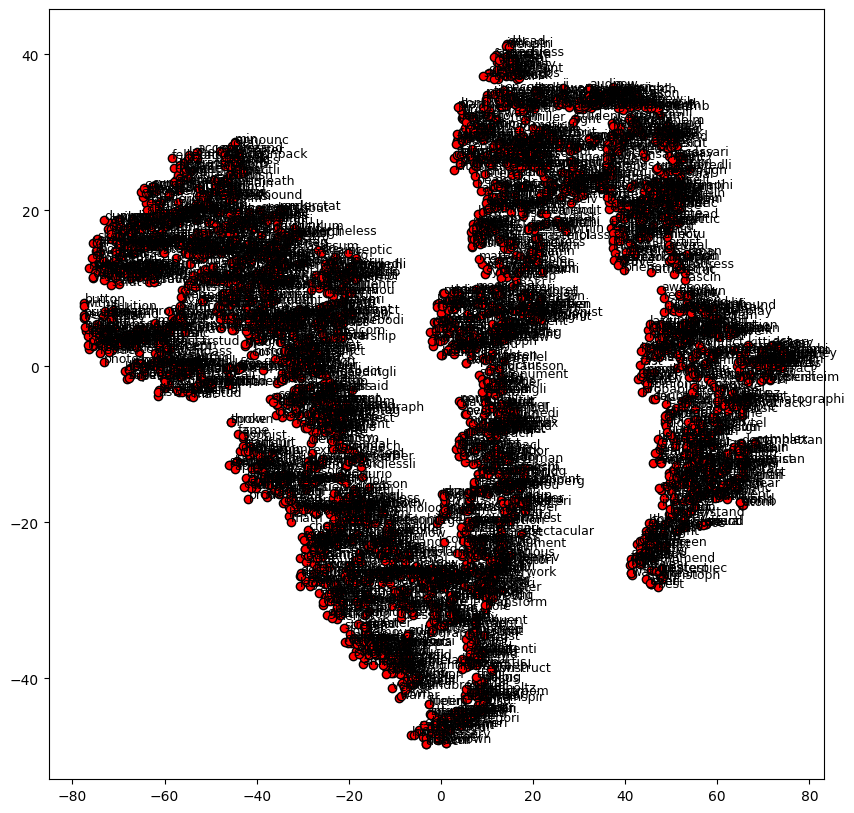

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np  # Import NumPy

# Assuming 'model' is your trained Word2Vec model

# Retrieve the vectors from the trained model
word_vectors = model.wv
vectors = [word_vectors[word] for word in word_vectors.index_to_key]

# Convert the list of vectors to a NumPy array
vectors_np = np.array(vectors)

# Use t-SNE to reduce dimensionality
tsne = TSNE(n_components=2, random_state=0)
vectors_2d = tsne.fit_transform(vectors_np)  # Pass the NumPy array here

# Plotting the results
plt.figure(figsize=(10,10))
plt.scatter(vectors_2d[:,0], vectors_2d[:,1], edgecolors='k', c='r')
for i, word in enumerate(word_vectors.index_to_key):
    plt.text(vectors_2d[i,0], vectors_2d[i,1], word, fontsize=9)

plt.show()


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
import pandas as pd
from textblob import TextBlob

# Define a function to classify sentiment
def classify_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Apply sentiment analysis to each review
data['sentiment'] = data['Clean_Body'].apply(classify_sentiment)

# Select relevant columns and assign a document ID
annotated_data = data.reset_index().rename(columns={'index': 'document_id'})
annotated_data = annotated_data[['document_id', 'Clean_Body', 'sentiment']]

# Save the annotated dataset to a CSV file
annotated_file_path = 'annotated_movie_reviews.csv'  # Adjust the path as needed
annotated_data.to_csv(annotated_file_path, index=False)

print(f'Annotated dataset saved to: {annotated_file_path}')

Annotated dataset saved to: annotated_movie_reviews.csv


In [ ]:
# The GitHub link of your final csv file


# Link:



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
After giving this project some thought, I realized it was both difficult and rewarding. It was quite difficult to implement TF-IDF and cosine similarity from scratch because it necessitated a thorough comprehension of the underlying mathematical ideas and how to apply them in Python without the help of pre-built libraries. This feature made me strengthen my background in vector space models and text processing, which was challenging and satisfying.

Making sure the TF-IDF calculation was accurate and that it was applied correctly to the document similarity computation was one of the trickiest aspects. In particular, debugging zero similarity scores forced me to carefully consider every stage of the procedure, from vector alignment to preprocessing. It underlined how crucial it is to pay close attention to details when implementing algorithms and preparing data, both of which are essential to data science.

On the plus side, I really valued the practical experience of manually writing these algorithms since it gave me a clear grasp of how they function behind the scenes. Seeing the algorithms come to life and yield useful outcomes, like the emergence of non-zero cosine similarity scores, was gratifying. It enhanced the learning process by demystifying the text analysis and similarity calculating procedures.

It felt that the amount of time allotted for the job was perfect. Despite the complexity of the objectives, the time constraints demanded concentrated work and effective problem-solving techniques. It motivated me to put what I'd learned into practice in a focused way, which improved my coding abilities as well as my capacity to operate under pressure.

All things considered, this task was a worthwhile educational experience. It improved my problem-solving abilities in addition to my technical proficiency in natural language processing (NLP). It was a very fulfilling and fascinating assignment because it struck a mix between challenge and enjoyment.